<a href="https://colab.research.google.com/github/IngerMasha/week11/blob/main/day4/NumPy_Advanced/NumPy%2C_Pandas_%26_Matplotlib_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

df = pd.read_csv('/content/global_power_plant_database.csv')

print(df.head())
print(df.info())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

<ipython-input-6-e8f9f75b9409>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/global_power_plant_database.csv')


In [7]:
df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(), inplace=True)
df.drop(columns=['other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url',
                 'geolocation_source', 'wepp_id', 'generation_data_source'], inplace=True)
df['commissioning_year'] = df['commissioning_year'].astype(int)
df['year_of_capacity_data'] = df['year_of_capacity_data'].astype(int)
print(df.describe())
print(df['country'].value_counts())
print(df['primary_fuel'].value_counts())


        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         2002.184223   
std      489.636072     22.638603     78.405850           17.249214   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         2007.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           34936.000000          6417.000000          7226.000000   
mean             2018.667134           592.696107           656.863891   
std                 1.117514          2174.833482          2231.464288   
min              2000.000000          -947.600000          -989.

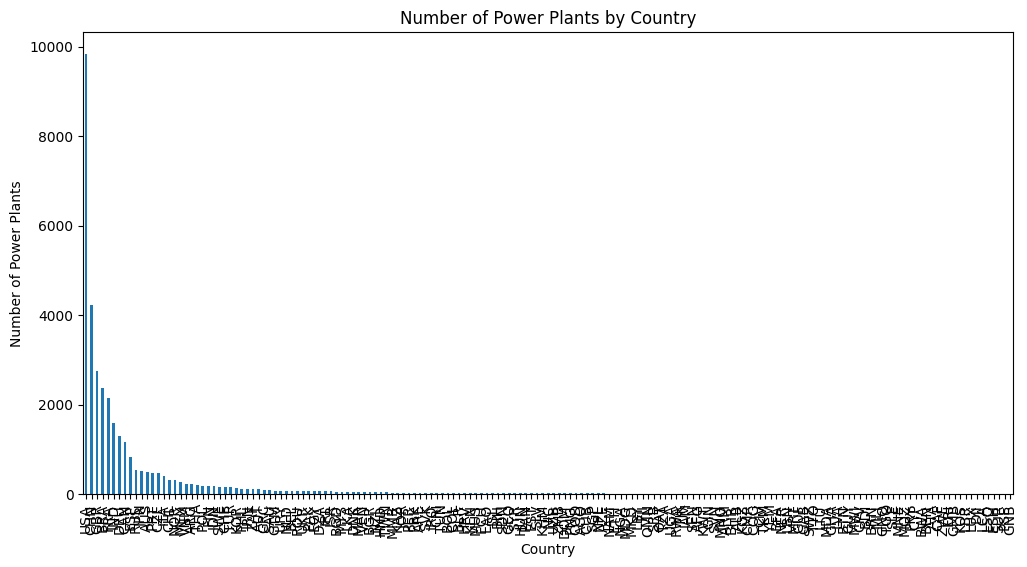

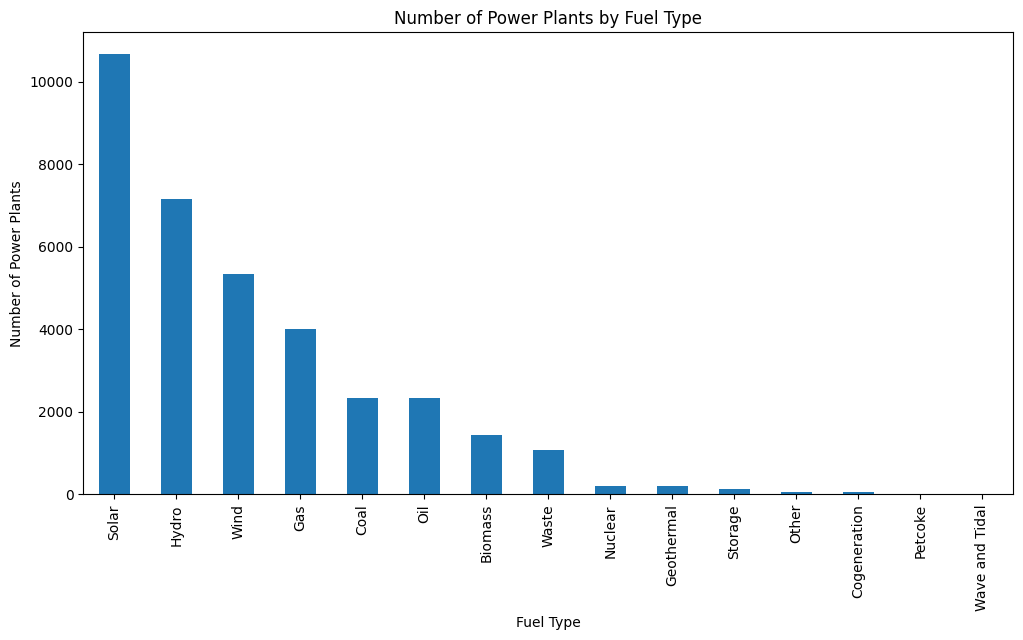

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df['country'].value_counts().plot(kind='bar')
plt.title('Number of Power Plants by Country')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 6))
df['primary_fuel'].value_counts().plot(kind='bar')
plt.title('Number of Power Plants by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=90)
plt.show()


In [10]:
from scipy.stats import f_oneway

df_gen = df[['primary_fuel', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
             'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']].dropna()
mean_output_by_fuel = df_gen.groupby('primary_fuel').mean()
print(mean_output_by_fuel)
fuel_types = df_gen['primary_fuel'].unique()
groups = [df_gen[df_gen['primary_fuel'] == fuel_type]['generation_gwh_2019'] for fuel_type in fuel_types]
anova_result = f_oneway(*groups)
print(f'ANOVA p-value: {anova_result.pvalue}')


              generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
primary_fuel                                                                  
Biomass                179.450190           176.191208           184.969618   
Coal                  3931.110328          3910.358747          3640.979072   
Cogeneration           133.108012           116.881276           114.172928   
Gas                    691.190067           668.449211           773.777312   
Geothermal             261.721122           266.007759           267.815138   
Hydro                  192.251809           184.674425           177.705442   
Nuclear              13333.621024         13384.459982         13518.930587   
Oil                     13.854090            15.581602            10.912476   
Other                   94.257235            85.522165            89.111659   
Petcoke                944.043346           829.801779           761.414599   
Solar                   14.214008            23.5504

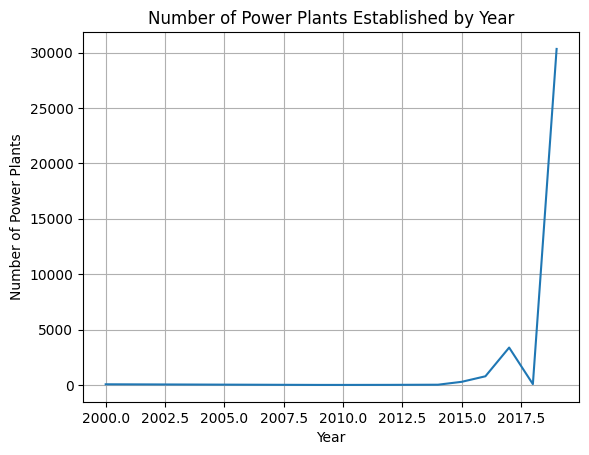

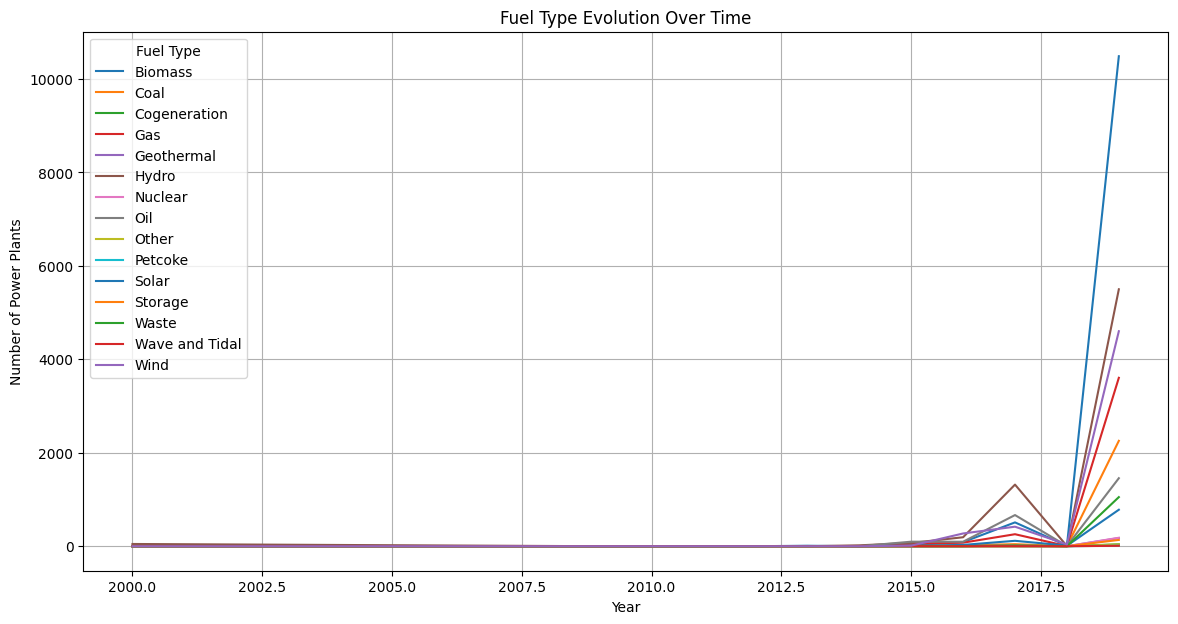

In [11]:
df['year_of_capacity_data'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Power Plants Established by Year')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.grid(True)
plt.show()

df_fuel_time = df.groupby(['year_of_capacity_data', 'primary_fuel']).size().unstack().fillna(0)
df_fuel_time.plot(kind='line', figsize=(14, 7))
plt.title('Fuel Type Evolution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()


<ipython-input-12-846957accda5>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


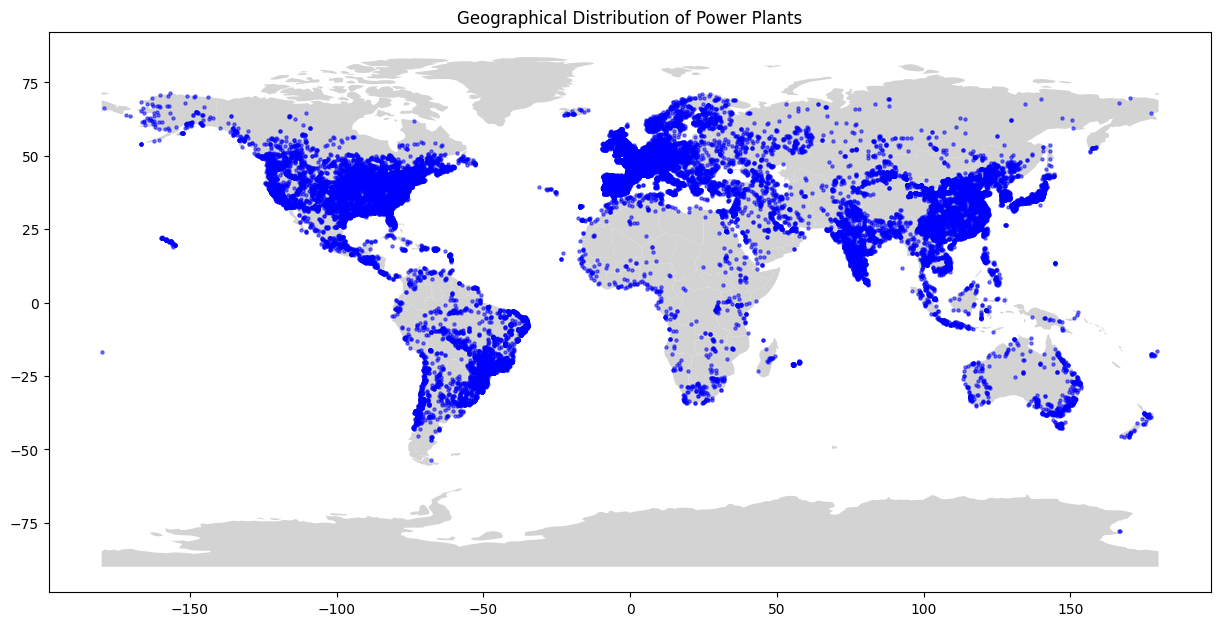

In [12]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title('Geographical Distribution of Power Plants')
plt.show()


In [14]:
import numpy as np
corr_matrix = df[['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2019']].corr()

eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [1.88176169 0.13327792 1.04351887 0.94144152]
Eigenvectors: [[-0.69879072  0.70513307  0.10938426  0.05013944]
 [ 0.09263675 -0.06932143  0.72983651  0.67375933]
 [-0.15379449 -0.10152011 -0.66134666  0.72709114]
 [-0.69242849 -0.69833771  0.13414302 -0.12195441]]


   country country_long         name   gppd_idnr  capacity_mw  latitude  \
10     ALB      Albania       Fierza  WRI1002170        500.0   42.2514   
11     ALB      Albania        Koman  WRI1002171        600.0   42.1033   
15     ALB      Albania  Vau i Dijes  WRI1002175        250.0   42.0137   
19     DZA      Algeria  Ain Djasser  WRI1023776        520.0   35.8665   
27     DZA      Algeria        Arbaa  WRI1023777        560.0   36.5988   

    longitude primary_fuel  commissioning_year  year_of_capacity_data  ...  \
10    20.0431        Hydro                1978                   2019  ...   
11    19.8224        Hydro                1985                   2019  ...   
15    19.6359        Hydro                1971                   2019  ...   
19     6.0262          Gas                2007                   2019  ...   
27     3.1375          Gas                2010                   2019  ...   

    estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
10          

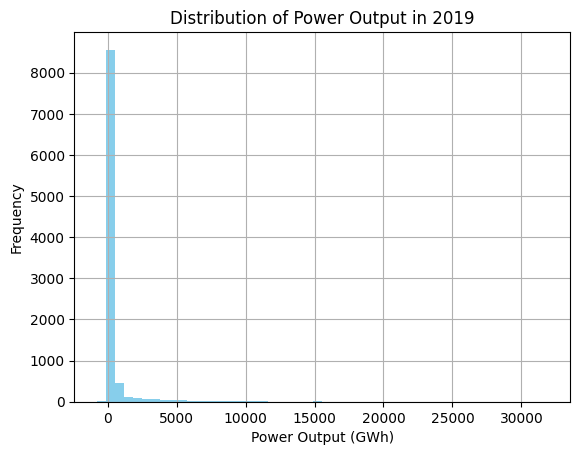

In [15]:
large_plants = df[df['capacity_mw'] > 100]
print(large_plants.head())

output_array = df[['generation_gwh_2019']].dropna().to_numpy()
plt.hist(output_array, bins=50, color='skyblue')
plt.title('Distribution of Power Output in 2019')
plt.xlabel('Power Output (GWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
